Importação das bibliotecas

In [47]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
#from fancyimpute import KNN 
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold, cross_val_score,cross_val_predict

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

from sklearn import metrics

%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

Importação do ficheiro excel

In [48]:
# nao apagar esta linha, para fazerem a imprtação de ficheiros a partir da vossa maquina, pfv comentem a linha abaixo e criem uma nova com o path
#data= pd.read_csv("C:\\Users\\omeut\\Downloads\\TrabalhoFinal\\EmployeeAbsenteeism\\train_data.csv")
#data = pd.read_csv("C:\\Users\\Telmo\\Documents\\GitHub\\EmployeeAbsenteeism\\train_data.csv")
#data_test = pd.read_csv("C:\\Users\\Telmo\\Documents\\GitHub\\EmployeeAbsenteeism\\test_data.csv")
data = pd.read_csv("./train_data.csv")
data_test = pd.read_csv("./test_data.csv")
data = pd.DataFrame(data)
data_test = pd.DataFrame(data_test)
print(data)

      ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0      1                  26                 7                3        1   
1      2                   0                 7                3        1   
2      3                  23                 7                4        1   
3      4                   7                 7                5        1   
4      5                  23                 7                5        1   
5      6                  23                 7                6        1   
6      7                  22                 7                6        1   
7      8                  23                 7                6        1   
8      9                  19                 7                2        1   
9     10                  22                 7                2        1   
10    11                   1                 7                2        1   
11    12                   1                 7                3        1   
12    13    

(Numero de linhas, numero de colunas)

In [49]:
data.shape

(500, 21)

In [50]:
data['Disciplinary failure'].unique()

array([0, 1], dtype=int64)

Colunas do dataSet

In [51]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent'],
      dtype='object')

Tipos de dados

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
ID                                 500 non-null int64
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null object
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                           

In [53]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,144.481833,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,1.000000,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,125.750000,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,250.500000,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,375.250000,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,500.000000,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


Como o mínimo para o Reason for absence é 0 e não temos nunhem significado para 0 entao vamos remover todas as linhas que o reason for absensce for 0

In [54]:
#vamos experimentar sem ignorar estes dados
#data = data.drop(data[data['Reason for absence']==0].index)
#data_test = data_test.drop(data[data['Reason for absence']==0].index)

In [55]:
data = data.drop(['Weight', 'Height','ID'], 1)
data_test = data_test.drop(['Weight', 'Height','ID'], 1)

In [56]:
data_test.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,23,9,6,1,179,26,9,30,261756,87,0,3,0,0,0,0,19
1,23,9,6,1,248,25,14,47,261756,87,0,1,2,0,0,1,32
2,23,9,2,1,179,51,18,38,261756,87,0,1,0,1,0,0,31
3,23,9,4,1,225,26,9,28,261756,87,0,1,1,0,0,2,24
4,23,9,2,1,179,26,9,30,261756,87,0,3,0,0,0,0,19


In [57]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,26.870000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,4.151092,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,31.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,38.000000,1.000000


Calculo de numero de dados unicos

In [58]:
data.nunique()

Reason for absence                 26
Month of absence                   12
Day of the week                     5
Seasons                             4
Transportation expense             23
Distance from Residence to Work    24
Service time                       15
Age                                20
Work load Average/day              27
Hit target                         12
Disciplinary failure                2
Education                           3
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 5
Body mass index                    16
Absent                              2
dtype: int64

Renomeamos as a coluna para retirar a barra do nome

In [59]:
data_test.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index'],
      dtype='object')

In [60]:
data.columns = data.columns.str.replace("Work load Average/day ", "Work load Average per day")
data_test.columns = data_test.columns.str.replace("Work load Average/day ", "Work load Average per day")


In [61]:
data["Work load Average per day"]=data["Work load Average per day"].str.replace(",","").astype(float)

In [62]:
data["Work load Average per day"].astype(int)
data_test["Work load Average per day"].astype(int)

0      261756
1      261756
2      261756
3      261756
4      261756
5      261756
6      261756
7      284853
8      284853
9      284853
10     284853
11     284853
12     284853
13     284853
14     284853
15     284853
16     284853
17     284853
18     284853
19     284853
20     284853
21     284853
22     284853
23     284853
24     284853
25     284853
26     284853
27     284853
28     284853
29     284853
        ...  
210    275089
211    275089
212    275089
213    275089
214    275089
215    275089
216    275089
217    275089
218    275089
219    275089
220    275089
221    275089
222    275089
223    275089
224    275089
225    264604
226    264604
227    264604
228    264604
229    264604
230    264604
231    264604
232    264604
233    264604
234    264604
235    264604
236    264604
237    271219
238    271219
239    271219
Name: Work load Average per day, Length: 240, dtype: int32

In [63]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,276792.768000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,26.870000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,43422.722869,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,4.151092,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,244387.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,265017.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,306345.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,31.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,38.000000,1.000000


In [64]:
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absent'],
      dtype='object')

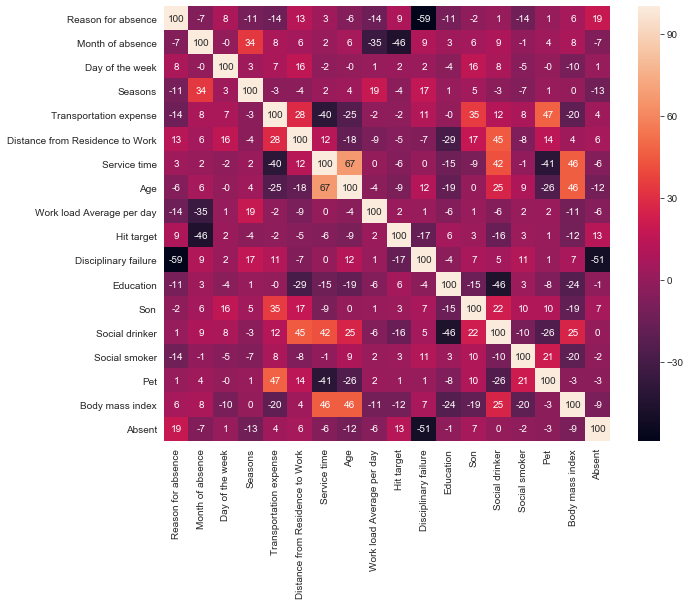

In [66]:
correlations = data.corr(method='pearson')
sns.set_style('white')
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations*100, annot=True, fmt='.0f' )

In [67]:
# Variables are " Continuos" and "Categorical"
con = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average per day', 'Transportation expense',
       'Hit target','Body mass index']

cat = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son', 'Absent']

In [68]:
#Checking missing values in train dataset
print(data.isnull().sum()) 
#result shows there arent missing values in the dataset

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average per day          0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Body mass index                    0
Absent                             0
dtype: int64


### Visualize data

Text(0.5, 1, 'Employee Absenteeism Statistics')

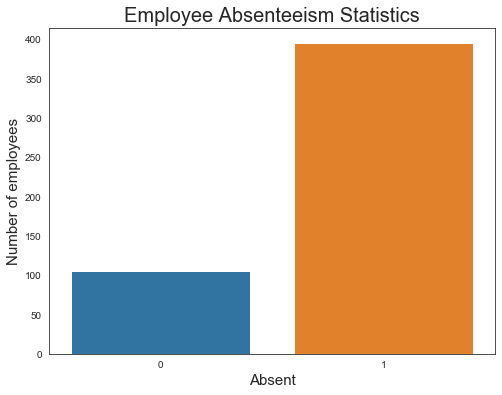

In [69]:
#Target Variable data distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Absent', data= data)
plt.xlabel('Absent', fontsize= 15)
plt.ylabel('Number of employees', fontsize= 15)
plt.savefig("Absentiseem_Vs_Count.png")
plt.title("Employee Absenteeism Statistics",fontsize= 20)

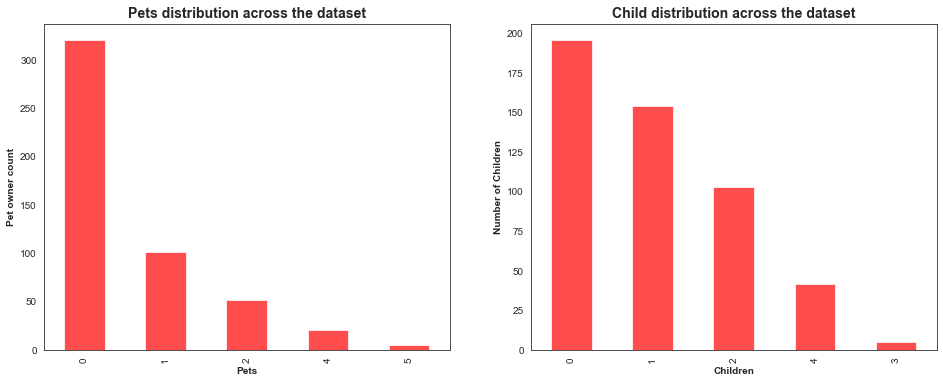

In [70]:
pet_counts=data['Pet'].value_counts().sort_values(ascending=False)
son_counts=data['Son'].value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(1,2,figsize=(16,6))
pet_counts.plot.bar(ax = ax[0],alpha=0.7,color='red' )
ax[0].set_title('Pets distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Pets',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Pet owner count',weight='bold',fontsize=10)# Set text for y axis

son_counts.plot.bar(ax = ax[1],alpha=0.7,color='red' )
ax[1].set_title('Child distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Children',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Number of Children',weight='bold',fontsize=10)# Set text for y axis
plt.savefig("Pets_distribution_andChildDist.png")

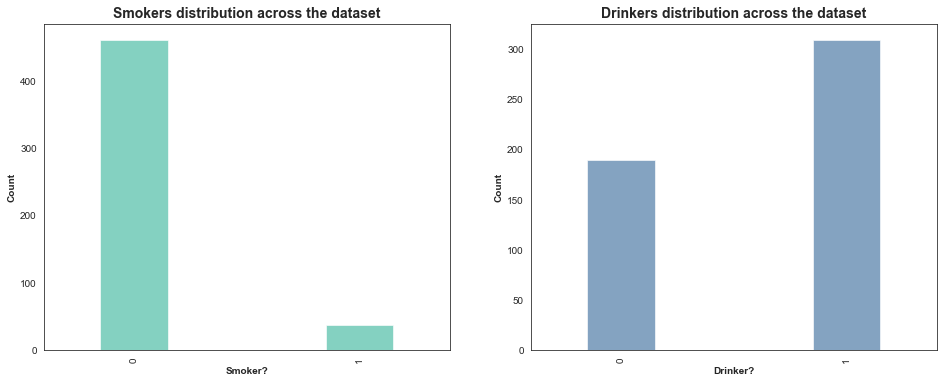

In [71]:
smoke_counts=data['Social smoker'].value_counts().sort_index()
drink_counts=data['Social drinker'].value_counts().sort_index()
fig, ax=plt.subplots(1,2,figsize=(16,6))
smoke_counts.plot.bar(ax = ax[0],alpha=0.6, color=(0.2, 0.7, 0.6, 0.6),width=0.3)
ax[0].set_title('Smokers distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Smoker?',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Count',weight='bold',fontsize=10)# Set text for y axis
drink_counts.plot.bar(ax = ax[1],alpha=0.6, color=(0.2, 0.4, 0.6, 0.6), width=0.3 )
ax[1].set_title('Drinkers distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Drinker?',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Count',weight='bold',fontsize=10)# Set text for y axis
plt.savefig("SmokersAndDrinkersDist.png")

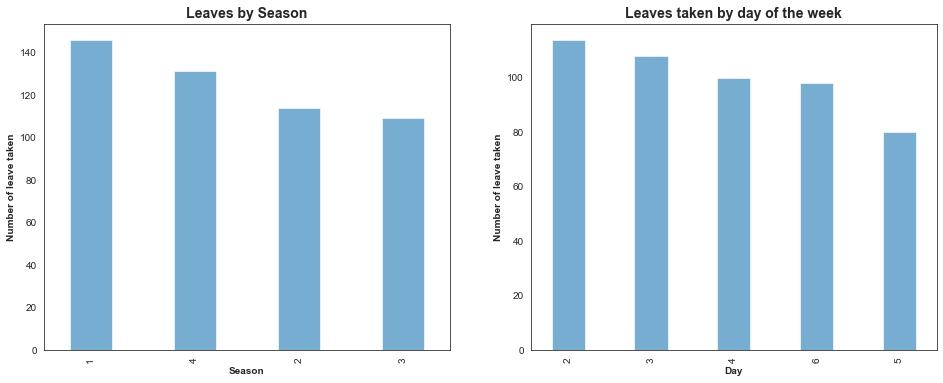

In [72]:
season_counts=data['Seasons'].value_counts().sort_values(ascending=False)
day_counts=data['Day of the week'].value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(1,2,figsize=(16,6))
season_counts.plot.bar(ax = ax[0],alpha=0.6,width=0.4 )
ax[0].set_title('Leaves by Season',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Season',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Number of leave taken',weight='bold',fontsize=10)# Set text for y axis
day_counts.plot.bar(ax = ax[1],alpha=0.6,width=0.4  )
ax[1].set_title('Leaves taken by day of the week',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Day',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Number of leave taken',weight='bold',fontsize=10)# Set text for y axis
plt.savefig("Leaves.png")

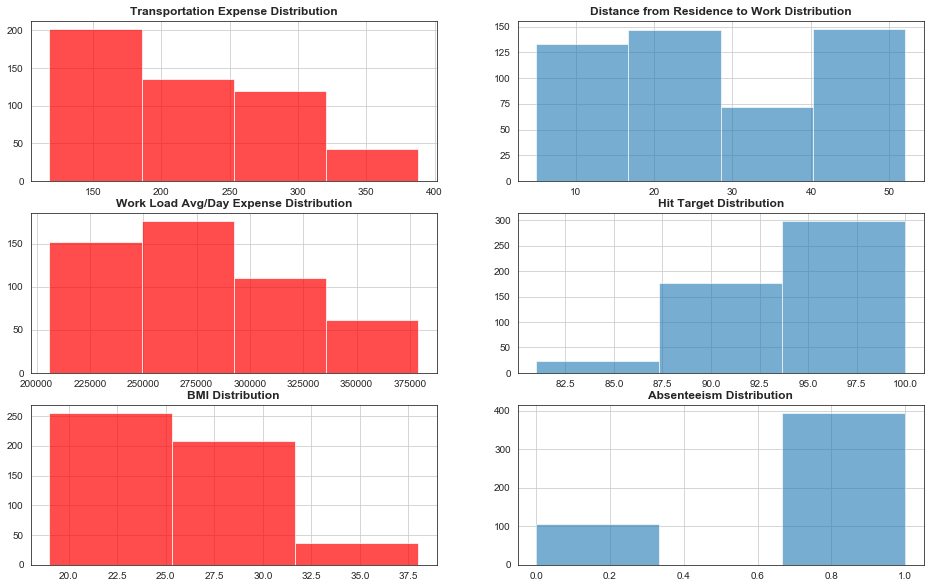

In [73]:
fig = plt.figure(figsize=(16,10))
plt.subplot(321)
plt.hist(data['Transportation expense'], bins = 4,color='red',alpha=0.7)
plt.title('Transportation Expense Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(322)
plt.hist(data['Distance from Residence to Work'], bins = 4,alpha=0.6)
plt.title('Distance from Residence to Work Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(323)
plt.hist(data['Work load Average per day'], bins = 4,color='red',alpha=0.7)
plt.title('Work Load Avg/Day Expense Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(324)
plt.hist(data['Hit target'], bins = 3,alpha=0.6)
plt.title('Hit Target Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(325)
plt.hist(data['Body mass index'], bins = 3,color='red',alpha=0.7)
plt.title('BMI Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(326)
plt.hist(data['Absent'], bins = 3,alpha=0.6)
plt.title('Absenteeism Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.savefig("Distribution.png")

**Como não possuimos valores nulos, não é necessário aplicar imputation**

### OutLier Analysis

In [74]:
def box_plot(x):
    plt.boxplot(data[x])
    plt.xlabel(x,fontsize= 15)
    plt.ylabel('Values',fontsize= 15)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)
    plt.savefig("Boxplot for {X}.png".format(X=x))
    plt.show()

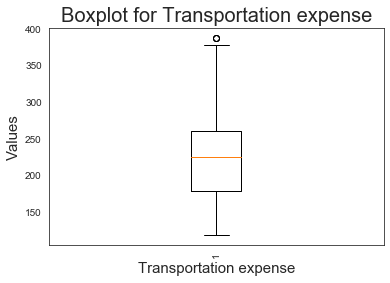

In [75]:
box_plot('Transportation expense')

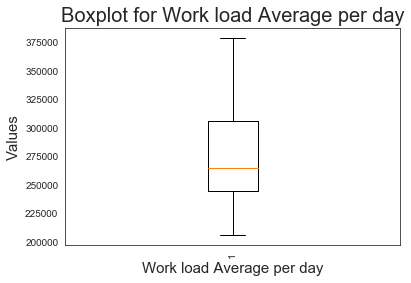

In [76]:
box_plot('Work load Average per day')

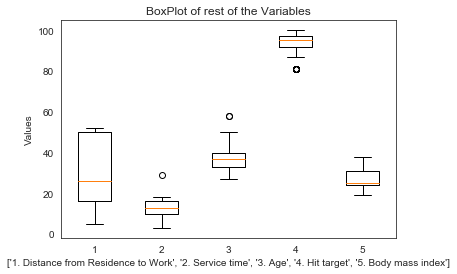

In [77]:
plt.boxplot([ data['Distance from Residence to Work'], data['Service time'], data['Age'], data['Hit target'], data['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')
plt.savefig('Boxplot for other variables')

In [78]:
# From the above boxplot we can conclude that in variables 'Distance from Residence to Work' and 'Body mass index'
# there are no outliers

In [79]:
# list of variables which doesn't have outlier
toIgnore = ['Distance from Residence to Work', 'Body mass index', 'Work load Average per day']

In [80]:


# Looping for all continuou variables to detect and impute Outliers
for i in con:
    # Avoiding the variables which doesn't have outlier
    if i in toIgnore:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(data[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    data.loc[data[i]< minimum,i] = np.nan
    data.loc[data[i]> maximum,i] = np.nan


# Imputing missing values with mode
data = data.fillna(data.mode().iloc[0])
# Checking if there is any missing value
data.isnull().sum().sum()

0

### Feature Scaling

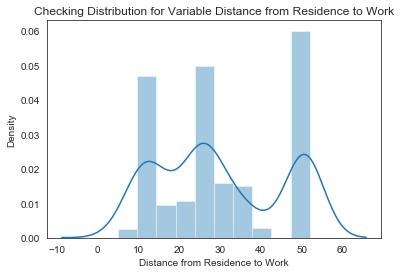

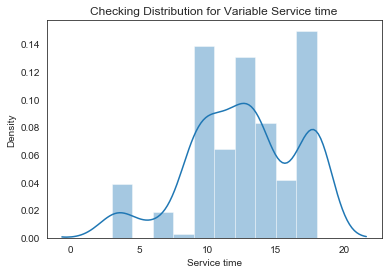

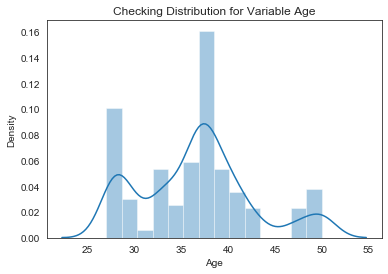

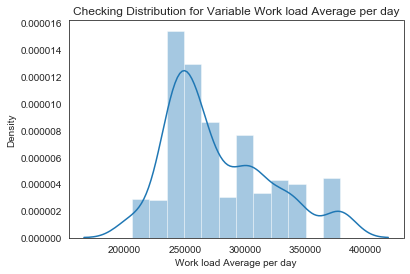

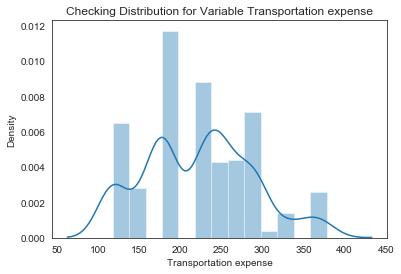

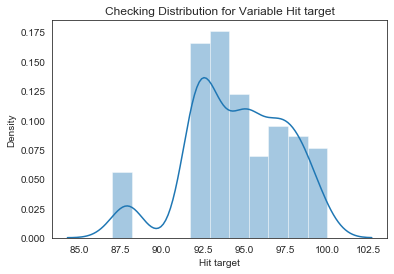

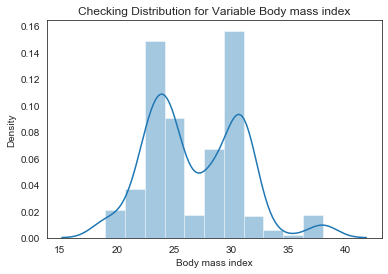

In [81]:
# Checking the distribution of values for variables in data
for i in con:
    if i == 'Absent':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

In [82]:
# Since our data is not normally distributed, we will use Normalization for Feature Scalling
# #Normalization
for i in con:
    if i == 'Absent':
        continue
    data[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())

In [83]:
# Since our data is not normally distributed, we will use Normalization for Feature Scalling for test
# #Normalization
for i in con:
    if i == 'Absent':
        continue
    data_test[i] = (data_test[i] - data_test[i].min())/(data_test[i].max()-data_test[i].min())

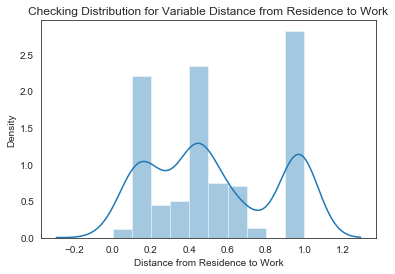

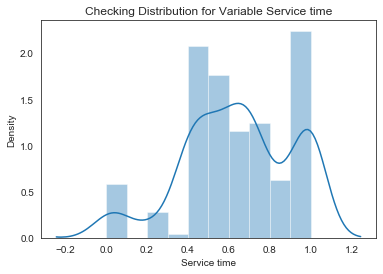

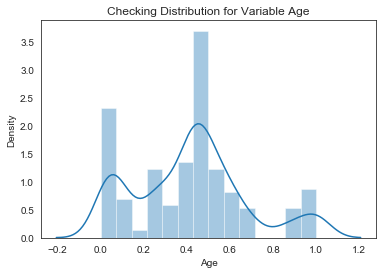

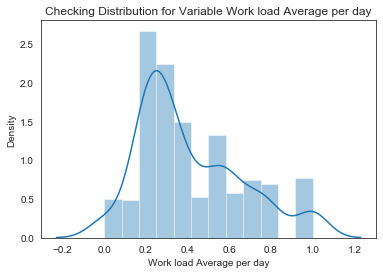

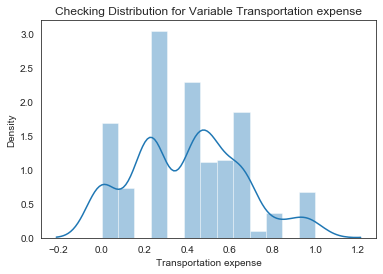

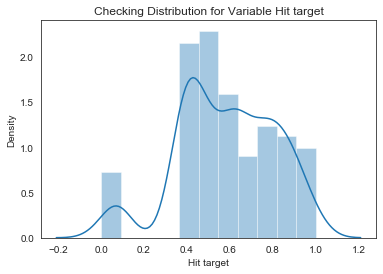

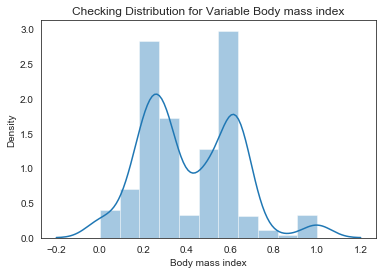

In [84]:
# Checking the distribution of values for variables in data again
for i in con:
    if i == 'Absent':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

# Machine Learning

## Spliting Data

In [184]:
# Using train_test_split sampling function for splitting data into  test and train samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, data.columns != 'Absent'], 
                         data.iloc[:, data.columns == 'Absent'], test_size = 0.30,random_state=109)

In [185]:
X_test

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
45,23,9,2,1,0.000000,0.106383,0.466667,0.434783,0.205583,0.384615,0,1,0,0,0,0,0.473684
259,23,8,3,1,0.657692,0.659574,0.666667,0.260870,0.345141,0.538462,0,1,2,1,0,1,0.578947
284,28,9,5,4,0.000000,0.170213,1.000000,1.000000,0.510502,0.384615,0,1,1,1,0,0,0.631579
496,28,9,3,1,0.492308,0.425532,0.866667,0.608696,0.322830,0.000000,0,1,0,1,0,0,0.210526
224,10,6,6,3,0.492308,0.425532,0.866667,0.608696,0.992288,0.538462,0,1,0,1,0,0,0.210526
198,19,4,3,3,0.657692,0.659574,0.666667,0.260870,0.696867,0.692308,0,1,2,1,0,1,0.578947
220,19,6,2,3,0.492308,0.425532,0.866667,0.608696,0.992288,0.538462,0,1,0,1,0,0,0.210526
357,19,12,2,2,0.657692,0.659574,0.666667,0.260870,0.177560,0.461538,0,1,2,1,0,1,0.578947
402,23,3,6,3,0.000000,0.170213,1.000000,1.000000,0.222412,0.846154,0,1,1,1,0,0,0.631579
467,28,7,3,1,0.000000,0.106383,0.466667,0.434783,0.140911,0.384615,0,1,0,0,0,0,0.473684


## Support Vector Machines

In [186]:
# Importing libraries for Linear Regression
#from sklearn.linear_model import LinearRegression
#print("--------------------using GridSearchCV  -------------------------------------------")
#from sklearn.model_selection import GridSearchCV 
#param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#             'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'kernel': ['rbf']}  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
#grid.fit(X_train, y_train) 
#grid_predictions = grid.predict(X_test) 
#score_Grid=metrics.accuracy_score(y_test, grid_predictions)
#print("Accuracy GRID TEST = "+ str(score_Grid.mean()))



print("--------------------Without k-fold-------------------------------------------")
# Building model on top of training dataset
fit_SVC = SVC(kernel='rbf', C=1, gamma=1).fit(X_train , y_train)
#create_grid_plot(fit_SVC, X_train, y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = fit_SVC.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_SVC.predict(X_test) #previsão com split data
pred_test1 = fit_SVC.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

#Generate file with prediction
f= open("PredictionSVM_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()

score_train=metrics.accuracy_score(y_train, pred_train)
score_test=metrics.accuracy_score(y_test, pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))


print("\n")

print("--------------------With k-fold-------------------------------------------")

kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_SVC, X_train, y_train, cv=kfold)
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_SVC, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

--------------------Without k-fold-------------------------------------------
Root Mean Squared Error For Training data = 0.13093073414159542
Root Mean Squared Error For Test data = 0.43969686527576396
Accuracy without K-FOLD (train) = 0.9828571428571429
Accuracy without K-FOLD (test) = 0.8066666666666666


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.7742857142857142
Accuracy (test) with K-FOLD = 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.83      1.00      0.91       123

    accuracy                           0.83       150
   macro avg       0.92      0.54      0.52       150
weighted avg       0.86      0.83      0.77       150



## Gaussian Naive Bayes

In [187]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
fit_GNB = GaussianNB().fit(X_train , y_train)

pred_train = fit_GNB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GNB.predict(X_test) #previsão com split data
pred_test1 = fit_GNB.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

#Generate file with prediction
f= open("PredictionGNB_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()

score_train=metrics.accuracy_score(y_train, pred_train)
score_test=metrics.accuracy_score(y_test, pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))


print("\n")

print("--------------------With k-fold-------------------------------------------")

kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_GNB, X_train, y_train, cv=kfold)
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_GNB, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

Root Mean Squared Error For Training data = 0.40355562548072954
Root Mean Squared Error For Test data = 0.32659863237109044
Accuracy without K-FOLD (train) = 0.8371428571428572
Accuracy without K-FOLD (test) = 0.8933333333333333


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.8371428571428572
Accuracy (test) with K-FOLD = 0.9133333333333333
              precision    recall  f1-score   support

           0       0.85      0.41      0.55        27
           1       0.88      0.98      0.93       123

    accuracy                           0.88       150
   macro avg       0.86      0.70      0.74       150
weighted avg       0.88      0.88      0.86       150



## Decision tree

In [198]:
# Importing libraries for Decision Tree 
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error
print("--------------------Without k-fold-------------------------------------------")
# Building model on top of training dataset
#fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)
fit_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=7,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random').fit(X_train,y_train);


pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))
score_train=metrics.accuracy_score(y_train, pred_train)

# Calculating metrics without k-fold
pred_test = fit_DT.predict(X_test) #previsão com split data
pred_test1 = fit_DT.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))
score_test=metrics.accuracy_score(y_test, pred_test)

#Generate file with prediction
f= open("PredictionDT_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()


print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))

print("\n")

print("--------------------With k-fold-------------------------------------------")
# Calculating metrics with k-fold
kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_DT, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_DT, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

--------------------Without k-fold-------------------------------------------
Root Mean Squared Error For Training data = 0.40355562548072954
Root Mean Squared Error For Test data = 0.32659863237109044
R^2 Score(coefficient of determination) = 0.27732610659439927
Accuracy without K-FOLD (train) = 0.8371428571428572
Accuracy without K-FOLD (test) = 0.8933333333333333


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.8314285714285715
Accuracy (test) with K-FOLD = 0.9266666666666666
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        27
           1       0.88      1.00      0.94       123

    accuracy                           0.89       150
   macro avg       0.94      0.70      0.76       150
weighted avg       0.91      0.89      0.87       150



## Random Forest

In [199]:
# Importing libraries for Random Forest
#from sklearn.ensemble import RandomForestRegressor
print("--------------------Without k-fold-------------------------------------------")
# Building model on top of training dataset
fit_RF = RandomForestClassifier(n_estimators = 700).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))
score_train=metrics.accuracy_score(y_train, pred_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test) #previsão com split data
pred_test1 = fit_RF.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))
score_test=metrics.accuracy_score(y_test, pred_test)

#Generate file with prediction
f= open("PredictionRF_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))


print("\n")

print("--------------------With k-fold-------------------------------------------")
 # Calculating metrics with k-fold
kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_RF, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_RF, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

--------------------Without k-fold-------------------------------------------
Root Mean Squared Error For Training data = 0.09258200997725514
Root Mean Squared Error For Test data = 0.408248290463863
R^2 Score(coefficient of determination) = -0.12917795844625113
Accuracy without K-FOLD (train) = 0.9914285714285714
Accuracy without K-FOLD (test) = 0.8333333333333334


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.837142857142857
Accuracy (test) with K-FOLD = 0.8866666666666667
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        27
           1       0.90      0.98      0.94       123

    accuracy                           0.89       150
   macro avg       0.86      0.75      0.79       150
weighted avg       0.89      0.89      0.88       150



### Applying PCA

In [200]:
#import library for PCA
from sklearn.decomposition import PCA
pca = PCA() 
#pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
data_test = pca.transform(data_test)

## Gaussian Naive Bayes

In [201]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
fit_GNB = GaussianNB().fit(X_train , y_train)

pred_train = fit_GNB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GNB.predict(X_test) #previsão com split data
pred_test1 = fit_GNB.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

#Generate file with prediction
f= open("PredictionGNB_PCA_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()

score_train=metrics.accuracy_score(y_train, pred_train)
score_test=metrics.accuracy_score(y_test, pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))


print("\n")

print("--------------------With k-fold-------------------------------------------")

kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_GNB, X_train, y_train, cv=kfold)
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_GNB, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

Root Mean Squared Error For Training data = 0.4242640687119285
Root Mean Squared Error For Test data = 0.34641016151377546
R^2 Score(coefficient of determination) = 0.1869918699186992
Accuracy without K-FOLD (train) = 0.82
Accuracy without K-FOLD (test) = 0.88


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.7971428571428572
Accuracy (test) with K-FOLD = 0.8666666666666667
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        27
           1       0.88      0.93      0.90       123

    accuracy                           0.83       150
   macro avg       0.71      0.67      0.68       150
weighted avg       0.82      0.83      0.82       150



## Decision Tree

In [203]:
# Importing libraries for Decision Tree 
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error
print("--------------------Without k-fold-------------------------------------------")
# Building model on top of training dataset
#fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)
fit_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=7,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random').fit(X_train,y_train);



pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))
score_train=metrics.accuracy_score(y_train, pred_train)

# Calculating metrics without k-fold
pred_test = fit_DT.predict(X_test) #previsão com split data
pred_test1 = fit_DT.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))
score_test=metrics.accuracy_score(y_test, pred_test)

#Generate file with prediction
f= open("PredictionDT_PCA_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()


print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))

print("\n")

print("--------------------With k-fold-------------------------------------------")
# Calculating metrics with k-fold
kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_DT, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_DT, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

--------------------Without k-fold-------------------------------------------
Root Mean Squared Error For Training data = 0.4566962103755937
Root Mean Squared Error For Test data = 0.38297084310253526
R^2 Score(coefficient of determination) = 0.006323396567299078
Accuracy without K-FOLD (train) = 0.7914285714285715
Accuracy without K-FOLD (test) = 0.8533333333333334


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.8
Accuracy (test) with K-FOLD = 0.98
              precision    recall  f1-score   support

           0       0.67      0.07      0.13        27
           1       0.83      0.99      0.90       123

    accuracy                           0.83       150
   macro avg       0.75      0.53      0.52       150
weighted avg       0.80      0.83      0.77       150



### Random Forest

In [204]:
# Importing libraries for Random Forest
#from sklearn.ensemble import RandomForestRegressor
print("--------------------Without k-fold-------------------------------------------")
# Building model on top of training dataset
fit_RF = RandomForestClassifier(n_estimators = 700).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))
score_train=metrics.accuracy_score(y_train, pred_train)

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test) #previsão com split data
pred_test1 = fit_RF.predict(data_test) #previsão com data set de teste
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))
score_test=metrics.accuracy_score(y_test, pred_test)

#Generate file with prediction
f= open("PredictionRF_PCA_Without_K-Fold.txt","w+")
f.write("ID,Absent\n")
i=0
j=501
for pred in pred_test1:
     f.write("%d,%d\n" % (j,pred))
     j=j+1

f.close()

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
print("Accuracy without K-FOLD (train) = "+ str(score_train))
print("Accuracy without K-FOLD (test) = "+ str(score_test))


print("\n")

print("--------------------With k-fold-------------------------------------------")
 # Calculating metrics with k-fold
kfold=KFold(n_splits=10,shuffle=True,random_state=np.random.seed(7)) #por pre-definiçao colocamos o 7 como valor
results = cross_val_score(fit_RF, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy (train) with K-FOLD = " + str(results.mean()))
results_test = cross_val_predict(fit_RF, X_test, y_test, cv=kfold)
print("Accuracy (test) with K-FOLD = " + str(results_test.mean()))

print(classification_report(y_test,results_test))

--------------------Without k-fold-------------------------------------------
Root Mean Squared Error For Training data = 0.09258200997725514
Root Mean Squared Error For Test data = 0.3559026084010437
R^2 Score(coefficient of determination) = 0.14182475158084917
Accuracy without K-FOLD (train) = 0.9914285714285714
Accuracy without K-FOLD (test) = 0.8733333333333333


--------------------With k-fold-------------------------------------------
Accuracy (train) with K-FOLD = 0.8285714285714285
Accuracy (test) with K-FOLD = 0.9066666666666666
              precision    recall  f1-score   support

           0       0.93      0.48      0.63        27
           1       0.90      0.99      0.94       123

    accuracy                           0.90       150
   macro avg       0.91      0.74      0.79       150
weighted avg       0.90      0.90      0.89       150

